<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependenices" data-toc-modified-id="Dependenices-1">Dependenices</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#GO-pathways" data-toc-modified-id="GO-pathways-5">GO pathways</a></span></li><li><span><a href="#Load-GO-table" data-toc-modified-id="Load-GO-table-6">Load GO table</a></span><ul class="toc-item"><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-6.1">Heatmap</a></span></li></ul></li><li><span><a href="#Top-Genes" data-toc-modified-id="Top-Genes-7">Top Genes</a></span></li><li><span><a href="#Create-a-gene-table" data-toc-modified-id="Create-a-gene-table-8">Create a gene table</a></span></li><li><span><a href="#Load-gene-table" data-toc-modified-id="Load-gene-table-9">Load gene table</a></span></li><li><span><a href="#Volcano-plots" data-toc-modified-id="Volcano-plots-10">Volcano plots</a></span></li><li><span><a href="#Deprecated" data-toc-modified-id="Deprecated-11">Deprecated</a></span></li><li><span><a href="#Enrichment-analysis-with-MSigDB" data-toc-modified-id="Enrichment-analysis-with-MSigDB-12">Enrichment analysis with MSigDB</a></span></li><li><span><a href="#Using-ReactomePA" data-toc-modified-id="Using-ReactomePA-13">Using ReactomePA</a></span></li></ul></div>

# Dependenices

In [10]:
library(ggrepel)
library(DESeq2)

library(clusterProfiler)
library(org.Hs.eg.db)



clusterProfiler v3.18.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




# Functions

In [11]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/plotting_functions.R")
source("~/OneDrive - UHN/R_src/Heatmap_functions.R")

In [12]:
gene_hm.fx <- function(genes_mat){

    col_fun= colorRamp2(c(-1, 0, 1), c("blue", "white", "red"))
    
    gene_hm = Heatmap(genes_mat,
                       #titles and names   
                       name = "Gene expression z score",   
                       show_row_names = TRUE,
                       show_column_names = FALSE,     
                       #clusters and orders  
                       cluster_columns = TRUE,
                       cluster_rows = FALSE,
                       show_column_dend = TRUE,
                       #row_dend_width = unit(8, "cm"),
                       #aesthestics
                       col = col_fun,
                       column_names_gp = gpar(fontsize = 20),
                       row_names_gp = gpar(fontsize = 20),
                       height = unit(nrow(genes_mat), "cm"),
                       column_title_gp = gpar(fontsize = 20),
                       column_title = NULL,
                       row_title = NULL)
    return(gene_hm)   
}

# Paths

In [13]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [14]:
load(file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

Run deseq2 on h4h

with only protein coding genes

# GO pathways

In [15]:
pathwaytable <- data.frame(matrix(ncol = 12, nrow = 0))

In [16]:
colnames(pathwaytable) <- c("ID","Description","setSize","enrichmentScore","NES","pvalue","p.adjust",
                            "qvalues","rank","leading_edge","core_enrichment", "contrast")

In [17]:
pathwaytable

ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,contrast
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>


In [18]:
for(c in unique(metadata_IC$immune_cluster)){
    
    message(c)
    flush.console()
    
    load(file = paste0(datapath, "DEG/shrunken_results_",c,".RData"))
    
    mycontrast <- paste0(c, "-Others")
    
    mygenelist <- shrunken_res$log2FoldChange
    names(mygenelist) <- rownames(shrunken_res)
    #order genelist
    mygenelist <- mygenelist[order(mygenelist, decreasing = T)]

    go <- gseGO(geneList     = mygenelist,
              OrgDb        = org.Hs.eg.db,
              ont          = "BP",
              keyType = "SYMBOL",
              minGSSize    = 100,
              maxGSSize    = 500,
              pvalueCutoff = 0.05,
              eps = 0,
              verbose = FALSE)
    
    godf <- as.data.frame(go)
    godf$contrast <- mycontrast
    
    pathwaytable <- rbind(pathwaytable, godf)
    
}

C2

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.03% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(...):
“There were 61 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
C1

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.03% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in f

In [19]:
GOpathwaytable <- pathwaytable

In [20]:
save(GOpathwaytable, file = paste0(datapath, "DEG/DESeq2_GOpathwaytable_shrunken.RData"))

# Load GO table

In [21]:
load(file = paste0(datapath, "DEG/DESeq2_GOpathwaytable_shrunken.RData"))

In [22]:
summary(GOpathwaytable$NES)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -2.664  -1.751  -1.385  -0.144   1.670   2.746 

In [23]:
sigpathways <- GOpathwaytable[abs(GOpathwaytable$NES) >= 2 &
                              GOpathwaytable$p.adjust < 0.1,]

In [24]:
exclusive_pathways <- sigpathways[0,]

In [25]:
exclusive_pathways

ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,contrast
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>


In [26]:
dim(GOpathwaytable)
dim(sigpathways)

[1] 2162   12

[1] 669  12

In [27]:
pathwayfreq <- as.data.frame(table(sigpathways$Description))

In [28]:
for(p in pathwayfreq$Var1){
    tmp <- sigpathways[ sigpathways$Description == p,]
    if( nrow(tmp) == 1){
        exclusive_pathways <- rbind(exclusive_pathways, tmp)
        
    } else{
        if( sum(tmp$NES > 0) == 1){
           exclusive_pathways <- rbind(exclusive_pathways, tmp) 
        }
        
    }
    
    
}

In [30]:
exclusive_pathways[ exclusive_pathways$contrast == "C1-Others" &
                   exclusive_pathways$NES > 1,]

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,contrast
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
GO:0002253,GO:0002253,activation of immune response,439,0.7211257,2.407223,1.237711e-50,9.000911e-49,5.095607e-49,2520,"tags=42%, list=13%, signal=37%",IGLL5/MS4A1/FCRL3/FPR2/CD79A/BLK/CD209/FCN1/CR1/FFAR2/CD3D/CCR7/BTNL3/TRAT1/CD3E/CLEC4C/FCGR2B/CD22/CD3G/UBASH3A/LCK/PVRIG/STAP1/CLEC10A/CR2/SH2D1A/PYHIN1/CD19/CTLA4/GPR33/GRAP2/HLA-DQA2/HLA-DQB2/LAX1/CD28/ITK/ZBP1/CD79B/GCSAM/FGR/CLEC4D/CD247/THEMIS/FCN3/SKAP1/MYO1G/SLA2/MNDA/ICAM3/ZAP70/FPR1/PAX5/PTPN22/FPR3/LCP2/C5AR1/BTNL8/NCR3/PTPRC/HCK/THEMIS2/C1QA/CR1L/C5AR2/WAS/CLEC4E/FCER1G/CLEC6A/HLA-DRA/VAV1/NFAM1/CD300A/C1QC/C1QB/C2/PTPN6/CFD/TXK/HLA-DQA1/BTK/VSIG4/HLA-DPB1/CD4/KLHL6/GATA3/FCGR2A/LILRB4/LILRA2/TESPA1/NCKAP1L/HLA-DPA1/FCGR3A/CFP/CD5L/HLA-DQB1/C3AR1/CEACAM1/CLEC4A/FCGR1A/IL1B/KCNN4/NLRC4/AIM2/CFB/HLA-DRB1/KLRK1/SYK/C6/CARD11/CD160/KRT1/PYCARD/LAT/C7/CMKLR1/LAT2/PSMB9/BMX/LYN/FOXP3/MUC12/BLNK/ARPC1B/PLCG2/MICB/CD226/TEC/C1S/RELB/PRAM1/MUC3A/LPXN/GBP1/INPP5D/NFKBIZ/C3/PSMB8/TLR4/PIK3CD/CARD9/C4BPB/ADA/HLA-A/PSMB10/CFH/PRKCD/NFKBID/A2M/C1R/ZC3H12A/PLSCR1/HLA-DRB5/WIPF1/IFI16/CFI/PRKCH/ICAM2/LGALS3/KLRC4-KLRK1/SERPING1/ICOSLG/RUNX1/BTN3A2/NR4A3/BTN2A2/VAV3/PSME2/C1RL/BTN3A3/CD38/ELF1/GCSAML/VTN/BAX/NFATC2/ARPC3/CSK/PSME1/ARPC5/RAB29/CD276/NFKB1/CD55/PRKCQ,C1-Others
GO:00022181,GO:0002218,activation of innate immune response,140,0.6490351,2.029326,1.950551e-10,1.309370e-09,7.412619e-10,1825,"tags=26%, list=9%, signal=23%",CD209/FCN1/FFAR2/CLEC4C/CLEC10A/PYHIN1/ZBP1/CLEC4D/MNDA/ICAM3/HCK/CLEC4E/FCER1G/CLEC6A/LILRA2/CLEC4A/NLRC4/AIM2/KLRK1/SYK/CARD11/PYCARD/PSMB9/LYN/MUC12/PLCG2/RELB/MUC3A/PSMB8/TLR4/CARD9/PSMB10/PRKCD/IFI16/ICAM2/KLRC4-KLRK1,C1-Others
GO:0002250,GO:0002250,adaptive immune response,407,0.8178651,2.728633,5.022614e-90,6.574601e-87,3.722021e-87,2005,"tags=59%, list=10%, signal=54%",JCHAIN/IGLL5/TNFRSF13B/CD79A/TNFRSF17/IL18RAP/CD209/CR1/CLEC4G/LILRB3/CD27/CXCL13/CD3D/SLAMF7/TRAT1/SLAMF6/CD3E/SIT1/LILRA6/CLEC4C/CCL19/FCGR2B/CCR6/CD3G/SLAMF1/LY9/LILRB5/IFNG/CLEC10A/CR2/PRF1/LILRB2/SH2D1A/IL7R/CD48/BATF/CD19/CTLA4/FCAMR/ARG1/CD8B/PDCD1/HLA-DQA2/CLC/HLA-DQB2/FCER2/LAX1/CCR2/IRF4/BTLA/HLA-DOB/CD28/ITK/CD6/CD79B/CLEC4D/CD247/THEMIS/CD1C/FCRL4/CD40LG/SKAP1/TLR8/CD7/IL10/GZMM/MYO1G/FUT7/SLA2/CD1A/ZAP70/GAPT/CD1B/EOMES/CD8A/BTNL8/CD1E/SLC11A1/CTSS/PTPRC/JAK3/C1QA/ZNF683/IL27/SASH3/CD244/SAMSN1/ADGRE1/TNFSF18/WAS/LILRB1/FCER1G/CLEC6A/HLA-DRA/AICDA/C1QC/C1QB/C2/PTPN6/LAMP3/TBX21/LAIR1/TXK/HLA-DQA1/TNFRSF14/BTK/CD74/HLA-DMB/GPR183/IL12RB1/CD80/HLA-DMA/MCOLN2/HLA-DPB1/CD4/LTA/KLHL6/CLEC4M/RIPK3/GATA3/CTSH/CD1D/LILRB4/PDCD1LG2/HLA-DOA/IL6/HLA-G/NLRP3/HLA-DPA1/LILRA1/TNFRSF1B/IL12B/HLA-DQB1/CEACAM1/CLEC4A/IL1B/ALOX15/HLA-F/CD84/FCGR1B/SIGLEC10/HLA-DRB1/ICAM1/KLRK1/SYK/C6/IL18R1/CD86/CD70/SPN/CD160/PYCARD/LAT/EBI3/TNFAIP3/C7/CD274/TNFSF13B/PIK3CG/BCL3/LAT2/HAVCR2/TNFRSF11A/BMX/IL2/LYN/TCIRG1/TNFSF13/FOXP3/IL4R/CTSC/IL23A/MICB/UNC93B1/SH2D1B/CD226/HLA-B/FGL2/PRDM1/IL18/TEC/C1S/LAG3/XCL1/RELB/B2M/UNC13D/INPP5D/POU2F2/NFKBIZ/HLA-E/IRF1/C3/IL1R1/TLR4/PIK3CD/IL1RL1/CLCF1/STAT6/C4BPB/ADA/IL31RA/CD40/IL4/NFKB2/NLRP10/HLA-A/RAB27A/HLX/PRKCD/CRACR2A/TGFB1/TNF/NFKBID/C1R/HLA-C/ZC3H12A/ANXA1/IL23R/TAP1/RSAD2/HLA-DRB5/IRF7/MR1/CFI/ERAP2/RNF125/CTSL/ORAI1/KLRC4-KLRK1/SERPING1/MICA/IL27RA/PTK2B/HFE/ICOSLG/IL33/MCOLN1/BTN3A2,C1-Others
GO:00197301,GO:0019730,antimicrobial humoral response,122,0.7499893,2.319230,6.549832e-18,6.750969e-17,3.821866e-17,2322,"tags=42%, list=12%, signal=37%",JCHAIN/BPIFA2/CCL13/BPIFB1/CTSG/CXCL9/CXCL10/CXCL13/S100A9/S100A8/PLA2G2A/S100A12/PPBP/LYZ/CXCL11/PGLYRP1/DEFA4/DEFA1/PF4/CAMP/SLC11A1/ELANE/DEFA3/PGLYRP4/GNLY/PF4V1/ITLN1/RNASE6/PI3/CXCL5/WFDC11/BCL3/LCN2/SPON2/RNASE3/LTF/CXCL8/CXCL1/HLA-E/SLPI/HLA-A/GALP/IL36RN/CXCL3/CXCL2/CXCL6/RARRES2/AZU1/CXCL14/PRTN3/BPI,C1-Others
GO:00301831,GO:0030183,B cell differentiation,135,0.7069255,2.201404,4.217107e-15,3.807030e-14,2.155240e-14,22

## Heatmap

In [31]:
fc_tab <- exclusive_pathways[,c("Description", "contrast","NES")]

In [32]:
fc_mat <- tidyr::spread(fc_tab, key = contrast, value = NES)

In [33]:
rownames(fc_mat) <- substring(fc_mat$Description, 1, 80)
fc_mat$Description <- NULL
fc_mat <- as.matrix(fc_mat)

In [34]:
head(fc_mat)

,C1-Others,C2-Others,C3-Others,C4-Others
activation of immune response,2.407223,NA,-2.298270,-2.383687
activation of innate immune response,2.029326,NA,NA,NA
adaptive immune response,2.728633,NA,-2.478622,-2.664119
angiogenesis,NA,NA,NA,-2.065291
antigen processing and presentation of exogenous peptide antigen,NA,2.108924,NA,NA
antimicrobial humoral response,2.319230,NA,-2.146507,-2.132154


In [35]:
fc_mat[is.na(fc_mat)] <- 0

In [31]:
head(fc_mat)

,C1-Others,C2-Others,C3-Others,C4-Others
angiogenesis,0.000000,0.000000,0,-2.022139
antigen processing and presentation of exogenous peptide antigen,0.000000,2.104021,0,0.000000
antigen processing and presentation of peptide antigen,0.000000,2.162810,0,-2.030692
antimicrobial humoral response,2.361443,0.000000,0,-2.448588
blood coagulation,0.000000,0.000000,0,-2.034347
"chemical synaptic transmission, postsynaptic",-2.020690,-2.044515,0,2.470123


In [32]:
library(ComplexHeatmap)
library(circlize)

In [33]:
col_fun= colorRamp2(c(-1, 0, 1), c("blue", "white", "red"))
    
pathways_hm = Heatmap(fc_mat,
                       #titles and names   
                       name = "Log2 FC",   
                       show_row_names = TRUE,
                       show_column_names = TRUE,     
                       #clusters and orders  
                       cluster_columns = FALSE,
                       cluster_rows = TRUE,
                       show_column_dend = FALSE,
                       #aesthestics
                       col = col_fun,
                       column_names_gp = gpar(fontsize = 3),
                       row_names_gp = gpar(fontsize = 3),
                       height = unit(120, "cm"), width = unit(10, "cm"),
                       column_title_gp = gpar(fontsize = 10),
                       column_title = NULL,
                       row_title = NULL)

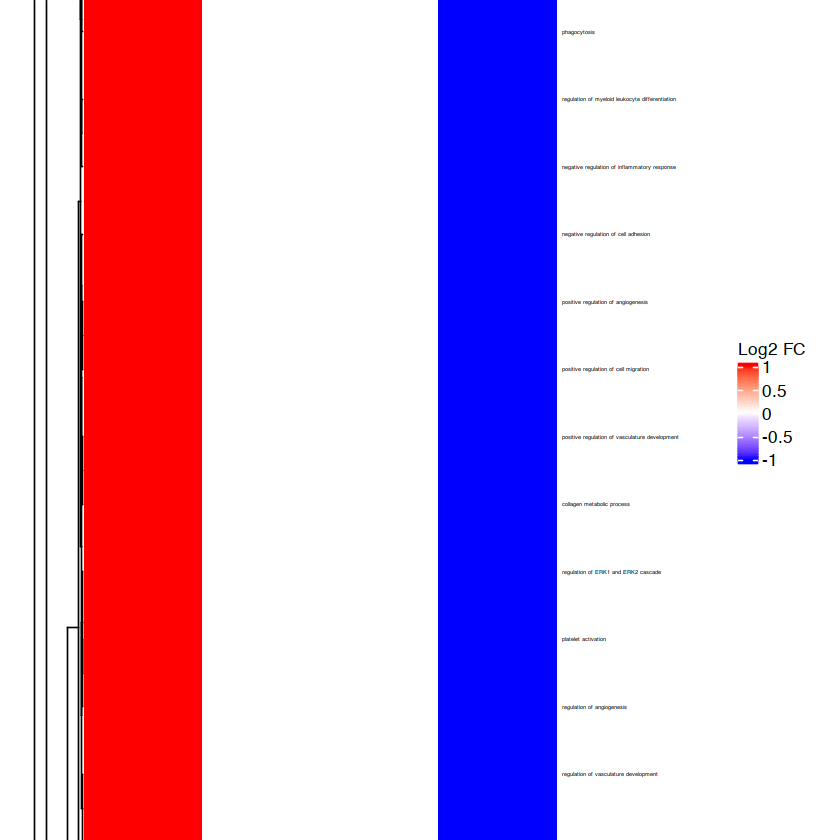

In [34]:
pathways_hm

In [35]:
pdf(paste0(plotpath, "GO_heatmap.pdf"),
   width = 20, height = 50)

draw(pathways_hm)

dev.off()

pdf 
  2

# Top Genes

# Create a gene table

In [225]:
genetable <- data.frame(matrix(ncol = 7, nrow = 0))
colnames(genetable) <- c('baseMean','log2FoldChange','lfcSE','pvalue','padj','Gene','contrast')

In [226]:
unique(metadata_IC$immune_cluster)

[1] "C2" "C3" "C4" "C1"

In [227]:
for(c in unique(metadata_IC$immune_cluster)){
    
    print(c)
    flush.console()
    
    load(file = paste0(datapath,"DEG/results_", c,"_withfilter.RData"))
    
    mycontrast <- paste0(c, "-Others")
    
    res <- as.data.frame(res)
    res$Gene <- rownames(res)
    rownames(res) <- NULL
    res$contrast <- mycontrast
    
    genetable <- rbind(genetable, res)
    
}

[1] "C2"
[1] "C3"
[1] "C4"
[1] "C1"


In [228]:
head(genetable)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene,contrast
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2058.61386,0.10757325,0.06220277,0,1,1,TSPAN6,C2-Others
2,20.32287,0.08314263,0.17875340,0,1,1,TNMD,C2-Others
3,837.69251,-0.02607829,0.03556666,0,1,1,DPM1,C2-Others
4,906.15295,-0.04433848,0.03041631,0,1,1,SCYL3,C2-Others
5,488.73588,0.01109061,0.04626931,0,1,1,C1orf112,C2-Others
6,420.17873,0.33902878,0.09730920,0,1,1,FGR,C2-Others


In [229]:
genetable <- genetable[, c("Gene", "contrast", 'baseMean','log2FoldChange','lfcSE','pvalue','padj')]

In [230]:
save(genetable, file = paste0(datapath, "DEG/genetable_DESeq2.RData"))

# Load gene table

In [231]:
load(file = paste0(datapath, "DEG/genetable_DESeq2.RData"))

In [232]:
head(genetable)

,Gene,contrast,baseMean,log2FoldChange,lfcSE,pvalue,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,C2-Others,2058.61386,0.10757325,0.06220277,1,1
2,TNMD,C2-Others,20.32287,0.08314263,0.17875340,1,1
3,DPM1,C2-Others,837.69251,-0.02607829,0.03556666,1,1
4,SCYL3,C2-Others,906.15295,-0.04433848,0.03041631,1,1
5,C1orf112,C2-Others,488.73588,0.01109061,0.04626931,1,1
6,FGR,C2-Others,420.17873,0.33902878,0.09730920,1,1


In [233]:
dysreg_sig_genes <- genetable[ genetable$padj < 0.1 &
                            abs(genetable$log2FoldChange) >= 2,]

In [234]:
dim(dysreg_sig_genes)

[1] 453   7

In [235]:
table(dysreg_sig_genes$contrast)


C1-Others C2-Others C4-Others 
      267        22       155 

In [236]:
dysreg_sig_genes[ which(dysreg_sig_genes$contrast == "C1-Others"),]

,Gene,contrast,baseMean,log2FoldChange,lfcSE,pvalue,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
58368,FGR,C1-Others,420.178734,2.057692,0.1266150,6.620910e-17,5.144977e-14
58425,ABCB5,C1-Others,24.739528,5.702053,0.4129470,4.877729e-30,3.158655e-26
58442,MEOX1,C1-Others,115.875604,2.202919,0.2541805,2.217288e-06,1.255838e-04
58553,SELE,C1-Others,182.930944,2.125420,0.2894084,1.007859e-04,4.037048e-03
58673,CD22,C1-Others,222.687802,2.208963,0.2145546,1.753048e-08,1.661291e-06
58740,SLC11A1,C1-Others,1839.257191,2.053223,0.1597879,4.357491e-11,7.558301e-09
58749,MARCO,C1-Others,251.746889,3.256844,0.2588860,2.843660e-18,3.452737e-15
58750,CYP24A1,C1-Others,55.975576,2.462899,0.2855340,3.001052e-07,2.074784e-05
58776,GABRA1,C1-Others,710.184018,-2.350874,0.3434544,8.382293e-05,3.435502e-03


# Volcano plots

In [237]:
volcano_plot <- function(genetable, contrast, foldchange, padj){
res <- genetable[ genetable$contrast == contrast,]    
    
res$threshold <- NA
res$threshold[res$log2FoldChange > foldchange & res$padj < padj] <- "Up-regulated"
res$threshold[res$log2FoldChange < -(foldchange) & res$padj < padj] <- "Down-regulated"
res$threshold[is.na(res$threshold)] <- "not significant"    

res$genelabels <- ifelse(res$padj < padj & abs(res$log2FoldChange) > foldchange, TRUE, FALSE)    

myplot <- ggplot(res, aes(x=log2FoldChange, y=-log10(pvalue))) +
geom_point(aes(color = threshold), size=2.5) +
scale_colour_manual(values = c("Down-regulated"= "blue", "Up-regulated"="red",  "not significant"= "black")) +
xlab("log2 fold change") + ylab("-log10 p-value") + 
geom_text_repel(label = ifelse(res$genelabels == TRUE, as.character(res$Gene),""), 
                box.padding = unit(.7, "lines"),hjust= 0.30) + myplot + myaxis + 
theme(legend.position = "none", axis.text.x = element_text(angle = 0)) +
    labs(title = contrast)
    
return(myplot)    
}

In [238]:
C1_volcano <- volcano_plot(genetable, "C1-Others", 2, 0.1)

In [239]:
C2_volcano <- volcano_plot(genetable, "C2-Others", 2, 0.1)

In [240]:
C3_volcano <- volcano_plot(genetable, "C3-Others", 2, 0.1)

Warning message:
“Removed 16 rows containing missing values (geom_point).”
Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”


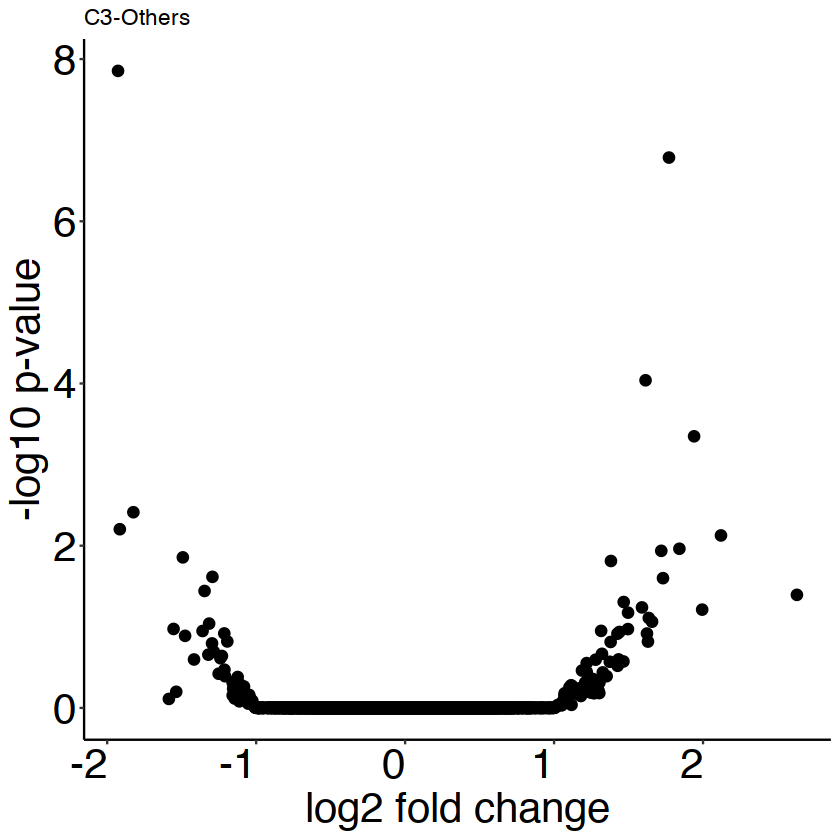

In [241]:
C3_volcano

In [242]:
C4_volcano <- volcano_plot(genetable, "C4-Others", 2, 0.1)

In [243]:
pdf(paste0(plotpath, "DESeq2_C1_volcano.pdf"),
   width = 10, height = 10)

C1_volcano

dev.off()

Warning message:
“Removed 27 rows containing missing values (geom_point).”
Warning message:
“Removed 27 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 253 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


pdf 
  2

In [244]:
pdf(paste0(plotpath, "DESeq2_C2_volcano.pdf"),
   width = 10, height = 10)

C2_volcano

dev.off()

Warning message:
“Removed 40 rows containing missing values (geom_point).”
Warning message:
“Removed 44 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


pdf 
  2

In [245]:
pdf(paste0(plotpath, "DESeq2_C3_volcano.pdf"),
   width = 10, height = 10)

C3_volcano

dev.off()

Warning message:
“Removed 16 rows containing missing values (geom_point).”
Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”


pdf 
  2

In [246]:
pdf(paste0(plotpath, "DESeq2_C4_volcano.pdf"),
   width = 10, height = 10)

C4_volcano

dev.off()

Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 123 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


pdf 
  2

# Deprecated

# Enrichment analysis with MSigDB

In [ ]:
library(fgsea)

In [ ]:
Hs.H <- read.table(paste0(datapath, "DEG/h.all.v7.1.symbols.gmt"), 
                   header = F, check.names = F, sep = "\t", fill = T, stringsAsFactors = F)

In [ ]:
rownames(Hs.H) <- Hs.H$V1
Hs.H$V1 <- NULL
Hs.H$V2 <- NULL

In [ ]:
Hs.H.list <- as.list(as.data.frame(t(Hs.H)))

In [ ]:
head(Hs.H.list)

In [ ]:
#shrunken_res_C4 <- shrunken_res_C4[order(shrunken_res_C4$log2FoldChange),]

In [ ]:
ranks <- shrunken_res_C1$log2FoldChange
names(ranks) <- rownames(shrunken_res_C1)
ranks <- ranks[!is.na(ranks)]
head(ranks)

In [ ]:
ranks <- sort(ranks, decreasing = T)

In [ ]:
barplot(ranks, decreasing = T)

In [ ]:
fgseaRes <- fgseaMultilevel(Hs.H.list, ranks, minSize=15, maxSize = 500, eps = 0)

In [ ]:
head(fgseaRes)

In [ ]:
ggplot(fgseaRes, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.2)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + myplot

# Using ReactomePA

In [ ]:
library(clusterProfiler)

In [ ]:
options(scipen = 999)

In [ ]:
myentrez <-  clusterProfiler::bitr(rownames(shrunken_res_C1), 
                                   fromType="SYMBOL", toType="ENTREZID", OrgDb= "org.Hs.eg.db")

In [ ]:
shrunken_res_C1$Entrez <- myentrez$ENTREZID[match(rownames(shrunken_res_C1), myentrez$SYMBOL)]

In [ ]:
library(ReactomePA)

In [ ]:
myentrez <-  clusterProfiler::bitr(rownames(shrunken_res_C1), 
                                   fromType="SYMBOL", toType="ENTREZID", OrgDb= "org.Hs.eg.db")

In [ ]:
shrunken_res_C1$Entrez <- myentrez$ENTREZID[match(rownames(shrunken_res_C1), myentrez$SYMBOL)]

In [ ]:
mygenelist <- shrunken_res_C1$log2FoldChange
names(mygenelist) <- shrunken_res_C1$Entrez

In [ ]:
summary(mygenelist)

In [ ]:
de <- names(mygenelist)[abs(mygenelist) > 1.5]
head(de)

In [ ]:
x <- enrichPathway(gene=de, pvalueCutoff = 0.05, readable=TRUE)
head(x)

In [ ]:
library(enrichplot)
barplot(x, showCategory=20)

In [ ]:
pdf(paste0(plotpath, "Reactome_C1_barplot.pdf"),
   width = 20, height = 20)

barplot(x, showCategory=20)

dev.off()

In [ ]:
mygenelist <- mygenelist[order(mygenelist, decreasing = T)]

In [ ]:
y <- gsePathway(mygenelist, 
                pvalueCutoff = 0.05,
                pAdjustMethod = "BH", 
                verbose = FALSE)
head(y)

In [ ]:
y <- as.data.frame(y)

In [ ]:
myenrichplot <- ggplot(y, aes(reorder(Description, NES), NES)) +
  geom_col(aes(fill=p.adjust<0.01)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + myplot

In [ ]:
pdf(paste0(plotpath, "Reactome_C1_enrichplot.pdf"),
   width = 20, height = 40)

myenrichplot

dev.off()

In [ ]:
pdf(paste0(plotpath, "Reactome_C1_dotplot.pdf"),
   width = 20, height = 20)

dotplot(y, showCategory=20)
dotplot(x, showCategory=20)

dev.off()

In [ ]:
edox <- setReadable(x, 'org.Hs.eg.db', 'ENTREZID')
p1 <- cnetplot(edox, foldChange= mygenelist)
## categorySize can be scaled by 'pvalue' or 'geneNum'
p2 <- cnetplot(edox, categorySize="pvalue", foldChange=mygenelist)


In [ ]:
pdf(paste0(plotpath, "Reactome_C1_cnet.pdf"),
   width = 20, height = 20)

p2

dev.off()

In [ ]:
edo <- pairwise_termsim(x)

In [ ]:

p1 <- emapplot(edo)
p2 <- emapplot(edo, cex_category=1.5)
p3 <- emapplot(edo, layout="kk")
p4 <- emapplot(edo, cex_category=1.5,layout="kk") 

In [ ]:
pdf(paste0(plotpath, "Reactome_C1_emap.pdf"),
   width = 20, height = 20)
p1
p2
p3
p4
dev.off()